# <b>PROJECT NAME : ITSM ABC TECH (PR-0012)

### <b>CONTRIBUTION
<b>

    - SIDDHESHWAR KOLI

## <B>PROJECT SUMMARY
<B> 
    
    - ABC Tech management recently attended Machine Learning conference on ML for ITSM.
    
    - Machine learning looks prospective to improve ITSM processes through prediction and automation. 

## <B>PROBLEM STATEMENT
<B>
    
    1) Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
    
    2) Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
    
    3) Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
    
    4) Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## <B>BUSINESS CASE DESCRIPTION

    - ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade.
    - They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year.
    - ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes.
    - These ITIL practices have matured over time, reaching a high level of process maturity.

    - Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI).
    - Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

    - In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes.
    - After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

    1) Predicting High Priority Tickets: ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

    2) Forecasting Incident Volume: The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

    3) Auto-Tagging Tickets: ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

    4) Predicting RFC and ITSM Asset Misconfigurations: The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

### <B>IMPORTING REQUIRED PACKAGES

In [ ]:
!pip install mysql-connector-python

In [ ]:
!pip install pandas mysql-connector-python
!pip install pymysql
!pip install mysql-connector

### <B>IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score,roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import pickle
import math
from collections import Counter
from imblearn.over_sampling import SMOTE

import os
import mysql.connector

### <B>DATABASE DETAILS

In [2]:
host = "18.136.157.135"
user = "dm_team"
password = "DM!$Team@&27920!"
database = "project_itsm"

### <B>ESTABLISH THE CONNECTION

In [3]:
connection=mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Check if the connection is successful
if connection.is_connected():
    print("Successfully connected to the database")
else:
    print("Failed to connect to the database")

Successfully connected to the database


### <B>CHECK NUMBER OF TABLES PRESENT IN DATABASE

In [4]:
##Finding the number of tables present in the database
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


### <b>LOADING THE TABLES

In [5]:
df=pd.read_sql_query('select * from dataset_list',connection)

### <B>CONVERT DATA FRAME TO CSV FILE

In [6]:
df.to_csv('dataset.csv', index=False)

### <B>ANALYZING THE  DATASET

In [7]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


### <B>FEATURE OVERVIEW
<B>

    - The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.
    
    
    
    - Here's a summary of some key fields in the dataset:

    1) CI_Name:
        Configuration Item Name – the name of the specific asset or item involved in the incident.

    2) CI_Cat: 
        Configuration Item Category – broad category under which the configuration item falls (e.g., hardware, software).

    3) CI_Subcat:
        Configuration Item Subcategory – more detailed classification within the configuration item category.
    
    4) WBS:
        Work Breakdown Structure – a project management reference often used to structure tasks and identify resources.

    5) Incident_ID:
        Incident Identifier – unique identifier for each incident.

    6) Status:
        Status of the Incident – current status of the incident (e.g., open, closed, in progress).

    7) Impact:
        Impact Level – how critical the incident is in terms of its effect on business operations.

    8) Urgency:
        Urgency Level – priority level for addressing the incident, potentially guiding response time.

    9) Priority:
        Priority Level – overall priority based on a combination of impact and urgency.

    10) number_cnt:
        Count Number – could be the number of occurrences or a frequency count related to the incident.

    11) Category:
        Category of the Incident – broader category classifying the type of incident (e.g., service request, problem, change).

    12) KB_number:
        Knowledge Base Number – reference to a knowledge base article or resource that might assist in resolving the incident.

    13) Alert_Status:
        Alert Status – current alert status of the incident (e.g., critical, warning, resolved).

    14) No_of_Reassignments:
        Number of Reassignments – count of times the incident has been reassigned to different teams or personnel.

    15) Open_Time:
        Open Time – timestamp for when the incident was first reported or logged.

    16) Reopen_Time:
        Reopen Time – timestamp for when the incident was reopened, if applicable.

    17) Resolved_Time:
        Resolved Time – timestamp for when the incident was resolved.

    18) Close_Time:
        Close Time – timestamp for when the incident was officially closed.

    19) Handle_Time_hrs:
        Handling Time in Hours – total time spent handling the incident in hours.

    20) Closure_Code:
        Closure Code – code or reason for closing the incident (e.g., resolved, rejected, duplicate).

    21) No_of_Related_Interactions:
        Number of Related Interactions – count of interactions (e.g., emails, calls) related to the incident.

    22) Related_Interaction:
        Related Interaction – reference or ID for interactions associated with the incident.

    23) No_of_Related_Incidents:
        Number of Related Incidents – count of other incidents linked to this one.

    24) No_of_Related_Changes:
        Number of Related Changes – count of related change requests associated with the incident.

    25) Related_Change:
        Related Change – reference or ID for a change request associated with the incident.

### <B>BASIC CHECKS

<B>CHECK SAMPLE 3 ROWS

In [8]:
df.sample(3)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
4040,DTA000027,application,Desktop Application,WBS000217,IM0004165,Closed,4,4,4,0.864843875,...,,10-10-2013 09:29,10-10-2013 09:29,"1,33,41,66,667",Other,1,SD0009891,,,
43111,WBA000107,application,Web Based Application,WBS000162,IM0043484,Closed,NS,3,NA,0.465983008,...,,14-03-2014 12:59,14-03-2014 12:59,"1,65,72,22,222",Other,1,SD0134012,,,
12195,WBA000133,application,Web Based Application,WBS000073,IM0012380,Closed,4,4,4,0.888999436,...,,19-11-2013 09:32,19-11-2013 09:32,"5,57,43,88,889",No error - works as designed,1,SD0034736,,,


<B>CHECK TOP 3 ROWS

In [9]:
df.head(3)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,


<B>CHECK BOTTOM 3 ROWS

In [10]:
df.tail(3)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,...,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


<B>CHECK INFORMATION ABOUT DATASET

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

<B>OBSERVATION

    - As we can observe, all the columns in the dataset are of the object data type.
    - We need to convert them into their appropriate data formats for proper analysis. Specifically:

    - Date columns should be converted to the datetime format to allow for accurate time-based calculations and comparisons.
    - Categorical columns need to be transformed into numerical values (e.g. through encoding techniques like one-hot encoding or label encoding) to ensure that they can be effectively used in machine learning models.

<B>DISPLAY ALL COLUMNS

In [12]:
# DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)

In [13]:
df.head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,


<B>CHECKING SIZE AND SHAPE OF DATASET

In [14]:
print(f" Shape of Data {df.shape}")
print(f" Size of Data {df.size}")

 Shape of Data (46606, 25)
 Size of Data 1165150


<B>CHECKING COLUMNS OF DATASET

In [15]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

<b>CHECK NULL VALUES COUNT 

In [16]:
null_count = sum(df.isnull().sum())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [17]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

<B>CHECK STATISTICAL INFORMATION

In [18]:
df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0047057,Closed,4,4,4,0.902319509,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


<B>CHECK DATATYPE OF ALL COLUMNS

In [19]:
df.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Status                        object
Impact                        object
Urgency                       object
Priority                      object
number_cnt                    object
Category                      object
KB_number                     object
Alert_Status                  object
No_of_Reassignments           object
Open_Time                     object
Reopen_Time                   object
Resolved_Time                 object
Close_Time                    object
Handle_Time_hrs               object
Closure_Code                  object
No_of_Related_Interactions    object
Related_Interaction           object
No_of_Related_Incidents       object
No_of_Related_Changes         object
Related_Change                object
dtype: object

<B>OBSERVATION

    - As we can observe, all the columns in the dataset are of the object data type.
    - We need to convert them into their appropriate data formats for proper analysis. Specifically:

    - Date columns should be converted to the datetime format to allow for accurate time-based calculations and comparisons.
    - Categorical columns need to be transformed into numerical values (e.g., through encoding techniques like one-hot encoding or label encoding) to ensure that they can be effectively used in machine learning models.

<B>CHECK DUPLICATE VALUES OF ALL COLUMNS

In [20]:
# checking the dataset having duplicate values
df.duplicated().sum()

np.int64(0)

<b>OBSERVATION

    The dataset dosen't consist of any duplicate values

<B>CHECK UNIQUE VALUES OF EACH COLUMN

In [21]:
for i in df:
    print(i   ,"----------",df[i].nunique())

CI_Name ---------- 3019
CI_Cat ---------- 13
CI_Subcat ---------- 65
WBS ---------- 274
Incident_ID ---------- 46606
Status ---------- 2
Impact ---------- 6
Urgency ---------- 6
Priority ---------- 6
number_cnt ---------- 46606
Category ---------- 4
KB_number ---------- 1825
Alert_Status ---------- 1
No_of_Reassignments ---------- 42
Open_Time ---------- 34636
Reopen_Time ---------- 2245
Resolved_Time ---------- 33628
Close_Time ---------- 34528
Handle_Time_hrs ---------- 30639
Closure_Code ---------- 15
No_of_Related_Interactions ---------- 50
Related_Interaction ---------- 43060
No_of_Related_Incidents ---------- 25
No_of_Related_Changes ---------- 5
Related_Change ---------- 233


<B>CHECK NULL VALUES

In [22]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

<B>OBSERVATION
    
- In our initial dataset analysis, we discovered that the "Alert_status" column exclusively contains "Closed" values, rendering it non-informative.
- Similarly, the "Incident_ID" or "Related_Interaction" column serves as an identifier with all rows exhibiting unique values, making it redundant. Consequently, we have decided to eliminate these columns.

In [23]:
df.drop(['Alert_Status','Incident_ID','Related_Interaction'],axis=1,inplace=True)

<B>OBSERVATION
- After identifying null values across all columns, it became evident that certain columns exhibited null values exceeding 90 percent.
- Given that these columns lack substantial information or utility due to the significant absence of data, we have made the decision to exclude/drop them from further analysis.

In [24]:
df.drop('Reopen_Time',axis=1,inplace=True)

<B>We are converting the data type of certain columns to the datetime format to enhance their significance in exploratory data analysis (EDA).

In [25]:
df.Open_Time=pd.to_datetime(df.Open_Time,dayfirst=True)

In [26]:
df.Resolved_Time=pd.to_datetime(df.Resolved_Time,dayfirst=True)

In [27]:
df.Close_Time=pd.to_datetime(df.Close_Time,dayfirst=True)

In [28]:
df['Open_Time']=pd.to_datetime(df['Open_Time'], dayfirst=True)

In [29]:
df['Close_Time']=pd.to_datetime(df['Close_Time'], dayfirst=True)

In [30]:
df['difference']=df['Close_Time']-df['Open_Time']

In [31]:
df['difference']

0       638 days 00:19:00
1       629 days 20:52:00
2       655 days 02:37:00
3       484 days 21:42:00
4       455 days 02:54:00
               ...       
46601     0 days 00:06:00
46602     0 days 00:26:00
46603     0 days 00:04:00
46604     0 days 00:07:00
46605     0 days 05:23:00
Name: difference, Length: 46606, dtype: timedelta64[ns]

In [32]:
df['difference'].max()

Timedelta('655 days 02:37:00')

In [33]:
df['difference'].min()

Timedelta('0 days 00:00:00')

In [34]:
df.difference.describe()

count                         46606
mean      5 days 03:07:58.623782345
std      18 days 20:47:39.550161405
min                 0 days 00:00:00
25%                 0 days 01:16:00
50%                 0 days 18:24:00
75%                 3 days 23:05:00
max               655 days 02:37:00
Name: difference, dtype: object

In [35]:
df['Close_Time']

0       2013-11-04 13:51:00
1       2013-12-02 12:36:00
2       2014-01-13 15:13:00
3       2013-11-14 09:31:00
4       2013-11-08 13:55:00
                ...        
46601   2014-03-31 16:29:00
46602   2014-03-31 15:29:00
46603   2014-03-31 15:32:00
46604   2014-03-31 15:42:00
46605   2014-03-31 22:47:00
Name: Close_Time, Length: 46606, dtype: datetime64[ns]

In [36]:
df['Open_Time']

0       2012-02-05 13:32:00
1       2012-03-12 15:44:00
2       2012-03-29 12:36:00
3       2012-07-17 11:49:00
4       2012-08-10 11:01:00
                ...        
46601   2014-03-31 16:23:00
46602   2014-03-31 15:03:00
46603   2014-03-31 15:28:00
46604   2014-03-31 15:35:00
46605   2014-03-31 17:24:00
Name: Open_Time, Length: 46606, dtype: datetime64[ns]

<B>Convert timedelta to hours in the existing 'difference' column

In [37]:
df['difference_hr'] = df['difference'].dt.total_seconds() / 3600

<B>Display the DataFrame with the 'difference' column now representing the time difference in hours

In [38]:
print(df[['difference_hr']])

       difference_hr
0       15312.316667
1       15116.866667
2       15722.616667
3       11637.700000
4       10922.900000
...              ...
46601       0.100000
46602       0.433333
46603       0.066667
46604       0.116667
46605       5.383333

[46606 rows x 1 columns]


### <B> EXPLORATORY DATA ANALYSIS
- Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset.
- Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data.
- Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline.
- By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

#### <B>UNIVARIATE ANALYSIS
- Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset.
- Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

<B> 1) Histogram :
- Description:
  - A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.<BR>
- Components:
  - Vertical bars represent the frequency or count of observations within each bin.
  - Bins categorize data points based on their values.
  - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

<B> 2) Countplot :  
- Description:
    - A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
- Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

In [39]:
df1=df[['CI_Cat','Status', 'Impact', 'Urgency','Priority','Category','Closure_Code','No_of_Related_Changes','No_of_Related_Incidents','No_of_Reassignments','No_of_Related_Interactions']]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 40))
plotnumber = 1

for i in df1:
    ax = plt.subplot(11, 1, plotnumber)
    sns.countplot(x=df1[i], palette='dark', ax=ax)  # Apply palette here
    
    # Add count annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')

    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(i, loc='center')
    plt.xticks(rotation=90)
    
    plotnumber += 1

plt.tight_layout()
plt.show()


<B>OBSERVATION
- Upon visualizing count plots for the categorical columns, a discernible trend emerged where specific categories overwhelmingly dominated in the majority of the plots. These dominant categories significantly overshadowed the presence of other categories.
- In the count plot for the 'CI_cat' column, it is evident that the categories 'application,' 'subapplication,' and 'computer' collectively constitute more than 90 percent of occurrences, significantly surpassing the prevalence of all other categories.
- Upon examining the 'status' column, it becomes apparent that the 'closed' status overwhelmingly represents more than 99 percent of the entries. Given this substantial imbalance and the lack of diverse information, we have opted to remove/drop this column from further analysis.
- Upon reviewing the Impact, Urgency, and Priority columns, it is evident that over 95 percent of tickets exhibit lower impact, lower urgency, and lower priority. This is indicated by the prevalence of values 3, 4, and 5, collectively accounting for more than 95 percent of the dataset, highlighting a tendency towards lower levels of impact, urgency, and priority across the tickets.
- Upon examining the Category column graph, it is evident that the categories 'incident' and 'request for information' overwhelmingly dominate the column. Together, these categories constitute approximately 99 percent of the values, highlighting their substantial prevalence within the dataset.
- By analyzing the 'Closure_Code' column, it is apparent that the top three categories are 'Software,' accounting for 28 percent of the data values, followed by 'User error' and 'No error - works as designed' with 8 percent each. These categories emerge as the most prominent within the dataset.
- Upon examination of the 'No_of_Related_Changes,' 'No_of_Related_Incidents,' 'No_of_Reassignments,' and 'No_of_Related_Interaction' columns, it is apparent that a consistent pattern exists across all four. More than 90 percent of the entries in each column indicate a dominance of having 1 related change, 1 related incident, 1 reassignment, and 1 related interaction, respectively. This suggests a prevalent association with singular instances across these columns in the dataset.  

In [40]:
df.drop('Status',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=df.CI_Subcat,palette='dark')
plt.tight_layout()
plt.show()

<B>OBSERVATION
- Upon examining the graph for 'CI_Subcat,' it is notable that among all the categories, only three categories - 'Server Based Application,' 'Web Based Application,' and 'Desktop Application' - collectively account for 82 percent of the data values.
- This indicates a substantial concentration of data within these specific categories.  

#### <B>BIVARIATE ANALYSIS
- Bivariate analysis involves the analysis of two variables to understand the relationships between them.
- It helps to explore the interactions and associations between pairs of variables. 

In [41]:
df.CI_Cat.value_counts().head(3)

CI_Cat
application       32900
subapplication     7782
computer           3643
Name: count, dtype: int64

In [ ]:
sns.countplot(
    x=df.loc[(df.CI_Cat == 'application') | (df.CI_Cat == 'subapplication') | (df.CI_Cat == 'computer'), 'CI_Cat'],
    hue=df.loc[(df.CI_Cat == 'application') | (df.CI_Cat == 'subapplication') | (df.CI_Cat == 'computer'), 'Priority'],
    palette='Dark2'
)
plt.show()

<b>OBSERVATION
- After analyzing the graph, it is evident that within each category, priorities 4 and 5 dominate over other priority levels.
- Additionally, the probability of tickets belonging to priority level 2 is higher in the computer category compared to other categories.

In [ ]:
sns.countplot(x=df.Impact, hue=df.Priority, palette='Dark2')
plt.show()

<b>OBSERVATION
- After analyzing the graph depicting impact versus priority, a discernible pattern emerges, indicating a similarity between the two columns.
- It appears that tickets with the same priority level tend to cluster at corresponding impact levels, suggesting a correlation between impact and priority in the dataset.

In [ ]:
sns.countplot(x=df.Urgency,hue=df.Priority,palette='Dark2')
plt.show()

<B>OBSERVATION
- After analyzing the graph for priority versus urgency, a noticeable pattern becomes apparent, revealing a similar relationship between the two columns.
- It appears that tickets with the same priority level tend to exhibit corresponding urgency levels, suggesting a consistent correlation between priority and urgency in the dataset.

In [42]:
df.Category.value_counts().head(3)

Category
incident                   37748
request for information     8846
complaint                     11
Name: count, dtype: int64

In [ ]:
sns.countplot(x=df.Category, hue=df.Priority,palette='Dark2')
plt.show()

<B>OBSERVATION
- After analyzing the graph, it is clear that in each category, priorities 4 and 5 dominate over other priority levels, with most of the datapoints concentrated in these top two categories.
- Additionally, there is a higher probability of tickets belonging to priority level 2 in the incident category compared to other categories.

In [43]:
df.Closure_Code.value_counts().head(3)

Closure_Code
Other         16470
Software      13027
User error     3554
Name: count, dtype: int64

In [ ]:
sns.countplot(
    x=df.loc[
        (df.Closure_Code == 'Other') | 
        (df.Closure_Code == 'Software') | 
        (df.Closure_Code == 'User error'),
        'Closure_Code'
    ],
    hue=df.loc[
        (df.Closure_Code == 'Other') | 
        (df.Closure_Code == 'Software') | 
        (df.Closure_Code == 'User error'),
        'Priority'
    ],
    palette='Dark2'
)
plt.show()

<b>OBSERVATION
- After analyzing the graph, it is evident that in each category, priorities 4 and 5 dominate over other priority levels.
- Additionally, the probability of tickets belonging to priority level 2 is higher in the software category compared to other categories.

In [44]:
df.No_of_Related_Changes.value_counts().head(5)

No_of_Related_Changes
     46046
1      536
2       21
3        2
9        1
Name: count, dtype: int64

In [ ]:
sns.countplot(x=df.No_of_Related_Changes, hue=df.Priority,palette='Dark2')
plt.show()

<b>OBSERVATION
- After visualizing the 'No_of_Related_Changes' column and conducting univariate analysis, it becomes apparent that instances with 1 change dominate the column.
- In comparison, priority level 4 tickets exhibit a higher frequency, and there is also notable prevalence in priority levels 5, 3, and 2 tickets within this column.

In [45]:
# Count rows with spaces or empty strings
count_spaces = (df['No_of_Related_Incidents'].str.strip() == '').sum()
print(f"Rows with spaces/empty strings: {count_spaces}")

Rows with spaces/empty strings: 45384


In [46]:
df.No_of_Related_Incidents.value_counts().head(3)

No_of_Related_Incidents
     45384
1     1057
2       74
Name: count, dtype: int64

### <b>DATA PREPROCESSING

#### <b>1) HANDLING WITH NULL VALUES

In [47]:
df.isnull().sum()

CI_Name                          0
CI_Cat                           0
CI_Subcat                        0
WBS                              0
Impact                           0
Urgency                          0
Priority                         0
number_cnt                       0
Category                         0
KB_number                        0
No_of_Reassignments              0
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  0
Closure_Code                     0
No_of_Related_Interactions       0
No_of_Related_Incidents          0
No_of_Related_Changes            0
Related_Change                   0
difference                       0
difference_hr                    0
dtype: int64

<B>OBSERVATION
- The 'Resolved_Time' column has instances of null values, being a date column.
- Consequently, we have determined to manage these null values when incorporating the column into the model creation process.
- Simultaneously, we are extending this approach to the 'Handle_time_hours' column, which is also a time-related column, ensuring a consistent strategy for handling null values across relevant temporal data features during the model creation phase.

In [48]:
df.CI_Cat.value_counts().head(5)

CI_Cat
application       32900
subapplication     7782
computer           3643
storage             703
hardware            442
Name: count, dtype: int64

In [49]:
df['CI_Cat'] = df['CI_Cat'].replace(r'^\s*$', 'application', regex=True)

In [50]:
df.CI_Subcat.value_counts().head()

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
Name: count, dtype: int64

In [51]:
count_spaces_or_nan = ((df['CI_Subcat'].str.strip() == '') | df['CI_Subcat'].isna()).sum()
print(f"Rows with spaces or NaN: {count_spaces_or_nan}")

Rows with spaces or NaN: 111


In [52]:
df['CI_Subcat'] = df['CI_Subcat'].replace(r'^\s*$', 'Server Based Application', regex=True)

In [53]:
df.Priority.value_counts()

Priority
4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: count, dtype: int64

In [54]:
count_spaces_or_nan = ((df['Priority'].str.strip() == 'NA') | df['Priority'].isna()).sum()
print(f"Rows with spaces or NaN: {count_spaces_or_nan}")

Rows with spaces or NaN: 1380


In [55]:
df['Priority'] = df['Priority'].replace(r'NA', '4', regex=True)

In [56]:
df.No_of_Reassignments.value_counts().head(4)

No_of_Reassignments
0    27468
1     7268
2     5378
3     2191
Name: count, dtype: int64

In [57]:
count_spaces_or_nan = ((df['No_of_Reassignments'].str.strip() == '') | df['No_of_Reassignments'].isna()).sum()
print(f"Rows with spaces or NaN: {count_spaces_or_nan}")

Rows with spaces or NaN: 1


In [58]:
df['No_of_Reassignments'] = df['No_of_Reassignments'].replace(r'^\s*$', '0', regex=True)

<b>OBSSERVATION
- After analyzing the business case, it appears that columns such as No_of_Related_Changes, No_of_Related_Incidents, and Related_Change would be valuable for model creation.
- Currently, we are not handling null values for these columns, but we plan to address them more effectively if necessary.

In [59]:
df.Closure_Code.isnull().sum()

np.int64(0)

In [60]:
count_spaces_or_nan = ((df['Closure_Code'].str.strip() == '') | df['Closure_Code'].isna()).sum()
print(f"Rows with spaces or NaN: {count_spaces_or_nan}")

Rows with spaces or NaN: 460


In [61]:
df.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
                                  460
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [62]:
df['Closure_Code'] = df['Closure_Code'].replace(r'^\s*$', 'Other', regex=True)

In [63]:
df.No_of_Related_Interactions.value_counts().head()

No_of_Related_Interactions
1    43058
2     2736
3      429
4      124
       114
Name: count, dtype: int64

In [64]:
count_spaces_or_nan = ((df['No_of_Related_Interactions'].str.strip() == '') | df['No_of_Related_Interactions'].isna()).sum()
print(f"Rows with spaces or NaN: {count_spaces_or_nan}")

Rows with spaces or NaN: 114


In [65]:
df['No_of_Related_Interactions'] = df['No_of_Related_Interactions'].replace(r'^\s*$', '1', regex=True)

#### <B>2) HANDLING WITH OUTLIER

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x=df.number_cnt, color='#00b4d8')
plt.title("Distribution of Number Count", fontsize=14, fontweight='bold')
plt.xlabel("Number Count", fontsize=12)
sns.despine()
plt.show()

<B>OBSERVATION
- Upon visualizing the boxplot for the "number_cnt" column, it is evident that there are no data points surpassing the upper and lower limits.
- The absence of any points beyond these limits indicates that there are no outliers in the dataset for this specific column.
- This observation suggests that the values within the "number_cnt" column fall within a reasonable range, without any extreme values that could be considered outliers based on the boxplot visualization.

#### <B>3) CONVERSION OF CATEGORICAL DATA

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
df.CI_Cat=le.fit_transform(df.CI_Cat)

In [68]:
df.CI_Name=le.fit_transform(df.CI_Name)

In [69]:
df.CI_Subcat=le.fit_transform(df.CI_Subcat)

In [70]:
df.WBS=le.fit_transform(df.WBS)

In [71]:
df['Impact'] = df['Impact'].replace({'NS': '4'}).astype(int)

In [72]:
df['Urgency'] = df['Urgency'].replace({'5 - Very Low': '5'}).astype(int)

In [73]:
df.Category=le.fit_transform(df.Category)

In [74]:
df.KB_number=le.fit_transform(df.KB_number)

In [75]:
df.Closure_Code=le.fit_transform(df.Closure_Code)

### <b>DATA SCALING AND FEATURE SELECTION

<b>The dataset primarily comprises categorical columns, except for one that ranges from 0 to 1, making scaling unnecessary. This unique structure enables a focused approach to model training and evaluation, leveraging the inherent characteristics of the dataset.

In [76]:
df.corr(numeric_only=True)

,CI_Name,CI_Cat,CI_Subcat,WBS,Impact,Urgency,Category,KB_number,Closure_Code,difference_hr
CI_Name,1.000000,0.168450,0.955859,-0.106713,0.102733,0.120099,0.072736,0.023000,0.073642,0.047180
CI_Cat,0.168450,1.000000,0.199085,-0.217976,-0.053643,-0.048221,-0.105516,-0.104256,-0.042221,-0.027959
CI_Subcat,0.955859,0.199085,1.000000,-0.124059,0.073399,0.095688,0.030193,0.007918,0.104601,0.045755
WBS,-0.106713,-0.217976,-0.124059,1.000000,0.036470,0.023112,0.116663,0.025495,-0.066865,-0.003140
Impact,0.102733,-0.053643,0.073399,0.036470,1.000000,0.953839,0.478724,0.081540,-0.091811,0.038952
Urgency,0.120099,-0.048221,0.095688,0.023112,0.953839,1.000000,0.470580,0.077220,-0.089882,0.038763
Category,0.072736,-0.105516,0.030193,0.116663,0.478724,0.470580,1.000000,-0.010460,-0.144793,0.013208
KB_number,0.023000,-0.104256,0.007918,0.025495,0.081540,0.077220,-0.010460,1.000000,0.023352,-0.048578
Closure_Code,0.073642,-0.042221,0.104601,-0.066865,-0.091811,-0.089882,-0.144793,0.023352,1.000000,-0.028227
difference_hr,0.047180,-0.027959,0.045755,-0.003140,0.038952,0.038763,0.013208,-0.048578,-0.028227,1.000000


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop('Priority',axis=1).corr(numeric_only=True)*100,annot=True)
plt.show()

<b>OBSERVATION
- Upon examining the correlation between columns through heatmap visualization, it was evident that only the categorical columns, specifically "CI_Subcat" and "CI_Name," exhibited a substantial correlation of around 95%. Notably, this correlation was observed without making any alterations to the dataset.

# <B>PROBLEM 1
#### <B>PREDICTING HIGH PRIORITY TICKETS : TO PREDICT 1 & 2 TICKETS, SO THAT THEY CAN TAKE PREVENTIVE MEASURES OR FIX THE PROBLEM BEFORE IT SURFACES.

In [77]:
x=df[['CI_Name','CI_Cat','CI_Subcat','WBS','Category','KB_number']]
y=df.Priority

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

In [79]:
print("X TRAIN",x_train.shape)
print("Y TRAIN",y_train.shape)
print("X TEST",x_test.shape)
print("Y TEST",y_test.shape)

X TRAIN (34954, 6)
Y TRAIN (34954,)
X TEST (11652, 6)
Y TEST (11652,)


In [80]:
df.Priority.value_counts()

Priority
4    24097
5    16486
3     5323
2      697
1        3
Name: count, dtype: int64

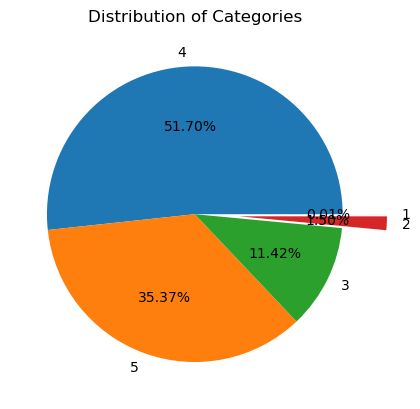

In [81]:
plt.pie(df['Priority'].value_counts(),labels=[4,5,3,2,1], autopct='%.2f%%',explode=[0, 0, 0, 0.3,0.3])
plt.title('Distribution of Categories')
plt.show()

<b>OBSERVATION
- Upon examining data points within each category, it becomes evident that the output column exhibits imbalance.
- Consequently, a decision has been made to address this imbalance using the SMOTE (Synthetic Minority Over-sampling Technique) method.

In [82]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [83]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [84]:
print(x_sm.shape)
print(y_sm.shape)

(90590, 6)
(90590,)


In [85]:
y_sm.value_counts()

Priority
4    18118
5    18118
3    18118
2    18118
1    18118
Name: count, dtype: int64

### <B>MODEL TRAINING

#### <B>1) LOGISTIC REGRESSION

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')

In [87]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [88]:
y_pred_lr = lr.predict(x_test)

In [89]:
y_pred_lr_train = lr.predict(x_sm)

<B>MODEL EVALUATION

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [91]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for test data : 0.5580157912804669
 accuracy_score for train data : 0.6604481730875372


In [92]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.7393782131946143


In [93]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.5580157912804669


In [94]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.08      0.67      0.14       162
           3       0.24      0.56      0.34      1356
           4       0.75      0.60      0.67      5979
           5       0.91      0.49      0.64      4154

    accuracy                           0.56     11652
   macro avg       0.40      0.47      0.36     11652
weighted avg       0.74      0.56      0.61     11652



In [95]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       0.94      1.00      0.97     18118
           2       0.64      0.68      0.66     18118
           3       0.47      0.55      0.51     18118
           4       0.50      0.59      0.54     18118
           5       0.89      0.49      0.63     18118

    accuracy                           0.66     90590
   macro avg       0.69      0.66      0.66     90590
weighted avg       0.69      0.66      0.66     90590



### <B>2) KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

In [ ]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.show()

In [ ]:
knn = KNeighborsClassifier(5)

In [ ]:
knn.fit(x_sm,y_sm)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
y_pred_knn_train = knn.predict(x_sm)

<B>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

### <B>3) SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_sm,y_sm)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
y_pred_svc_train = svc.predict(x_sm)

<B>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

<B>OBSERVATION
- Following an evaluation of the outcomes achieved by the random forest, it has come to our attention that the model is displaying indications of overfitting. To enhance the model's generalization capabilities, we will proceed with hyperparameter tuning for the random forest algorithm.
- Among all the models, SVM is consuming a significant amount of time, leading us to opt against conducting hyperparameter tuning for SVM.

### <B>4) DECISION TREE CLASSIFIER

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dtc = DecisionTreeClassifier()

In [154]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [155]:
y_pred_dtc= dtc.predict(x_test)

In [156]:
y_pred_dtc_train=dtc.predict(x_sm)

<B>MODEL EVALUATION

In [157]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.8591658084449022
 accuracy_score for train data : 0.9361187769069433


In [158]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.8886464139588177


In [159]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.8591658084449022


In [160]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.21      0.60      0.31       162
           3       0.62      0.79      0.69      1356
           4       0.93      0.84      0.88      5979
           5       0.94      0.91      0.93      4154

    accuracy                           0.86     11652
   macro avg       0.54      0.63      0.56     11652
weighted avg       0.89      0.86      0.87     11652



In [161]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00     18118
           2       0.92      0.97      0.94     18118
           3       0.90      0.90      0.90     18118
           4       0.91      0.87      0.89     18118
           5       0.95      0.94      0.94     18118

    accuracy                           0.94     90590
   macro avg       0.94      0.94      0.94     90590
weighted avg       0.94      0.94      0.94     90590



<B>OBSERVATION
- Following an evaluation of the outcomes achieved by the random forest, it has come to our attention that the model is displaying indications of overfitting. To enhance the model's generalization capabilities, we will proceed with hyperparameter tuning for the random forest algorithm.
- After reviewing the results obtained from the decision tree, it is evident that the model is exhibiting signs of overfitting. To create a more generalized model, we will undertake hyperparameter tuning for the decision tree algorithm.

#### <B>HYPERPARAMETER TUNNING FOR DECISION TREE

In [162]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [163]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

In [164]:
grid_search.fit(x_sm, y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [165]:
best_params = grid_search.best_params_

In [166]:
best_dt_classifier = DecisionTreeClassifier(**best_params)

In [167]:
best_dt_classifier.fit(x_sm, y_sm)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [168]:
y_pred = best_dt_classifier.predict(x_test)

In [169]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)

Test Accuracy for Decision Tree: 0.8592516306213526


### <B>5) RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [98]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [99]:
y_pred_rfc=rfc.predict(x_test)

In [100]:
y_pred_rfc_train = rfc.predict(x_sm)

<B>MODEL EVALUATION

In [101]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.8578784757981462
 accuracy_score for train data : 0.9360966994149464


In [102]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.8885439746113919


In [103]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.8578784757981462


In [104]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.60      0.30       162
           3       0.62      0.79      0.70      1356
           4       0.93      0.85      0.89      5979
           5       0.95      0.91      0.93      4154

    accuracy                           0.86     11652
   macro avg       0.54      0.63      0.56     11652
weighted avg       0.89      0.86      0.87     11652



In [105]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00     18118
           2       0.91      0.97      0.94     18118
           3       0.90      0.90      0.90     18118
           4       0.91      0.88      0.89     18118
           5       0.96      0.93      0.95     18118

    accuracy                           0.94     90590
   macro avg       0.94      0.94      0.94     90590
weighted avg       0.94      0.94      0.94     90590



<B>OBSERVATION
- Following an evaluation of the outcomes achieved by the random forest, it has come to our attention that the model is displaying indications of overfitting. To enhance the model's generalization capabilities, we will proceed with hyperparameter tuning for the random forest algorithm.

#### <B>HYPERPARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [136]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [137]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [129]:
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)

In [138]:
grid_search = RandomizedSearchCV(estimator=rfc,
                                 param_distributions=param_grid,
                                 n_iter=50,             # Number of random combinations to try
                                 cv=5,                  # 5-fold cross-validation
                                 scoring='f1',
                                 n_jobs=-1,
                                 verbose=1,
                                 random_state=42
                                )

In [139]:
grid_search.fit(x_sm, y_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='f1', verbose=1)

In [140]:
best_rf_classifier = grid_search.best_estimator_

In [141]:
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini'}


In [142]:
y_pred_rfc = best_rf_classifier.predict(x_test)

<B>MODEL EVALUATION

In [143]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.8618262959148644
 accuracy_score for train data : 0.9360966994149464


In [144]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.8910043009787149


In [145]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.8618262959148644


In [146]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.23      0.67      0.34       162
           3       0.62      0.80      0.70      1356
           4       0.93      0.84      0.89      5979
           5       0.94      0.92      0.93      4154

    accuracy                           0.86     11652
   macro avg       0.55      0.65      0.57     11652
weighted avg       0.89      0.86      0.87     11652



In [147]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00     18118
           2       0.91      0.97      0.94     18118
           3       0.90      0.90      0.90     18118
           4       0.91      0.88      0.89     18118
           5       0.96      0.93      0.95     18118

    accuracy                           0.94     90590
   macro avg       0.94      0.94      0.94     90590
weighted avg       0.94      0.94      0.94     90590



#### <B>MODEL EVALUATION REPORT

<b>LogisticRegression Model:  
- accuracy_score  : 0.6142857142857143
- precision_score : 0.915241272070626
- recall_score f: 0.6142857142857144
  
<b>K Nearest Neighbors Classifier Model:  
- accuracy_score : 0.7071428571428572
- precision_score :0.9111263736263736  
- recall_score : 0.7071428571428572

<b>SVM Classifier Model:         
- accuracy_score : 0.8142857142857143
- precision_score : 0.9451127819548871
- recall_score : 0.8142857142857143
  
<b>Decision Tree Classifier Model:
- accuracy_score : 0.8592516306213526
- precision_score : 0.8886464139588177
- recall_score : 0.8591658084449022
   
<b>Random Forest Classifier Model:
- accuracy_score : 0.8618262959148644
- precision_score  0.8910043009787149
- recall_score: 0.8618262959148644

## <b>MODEL METRICS VISULATION

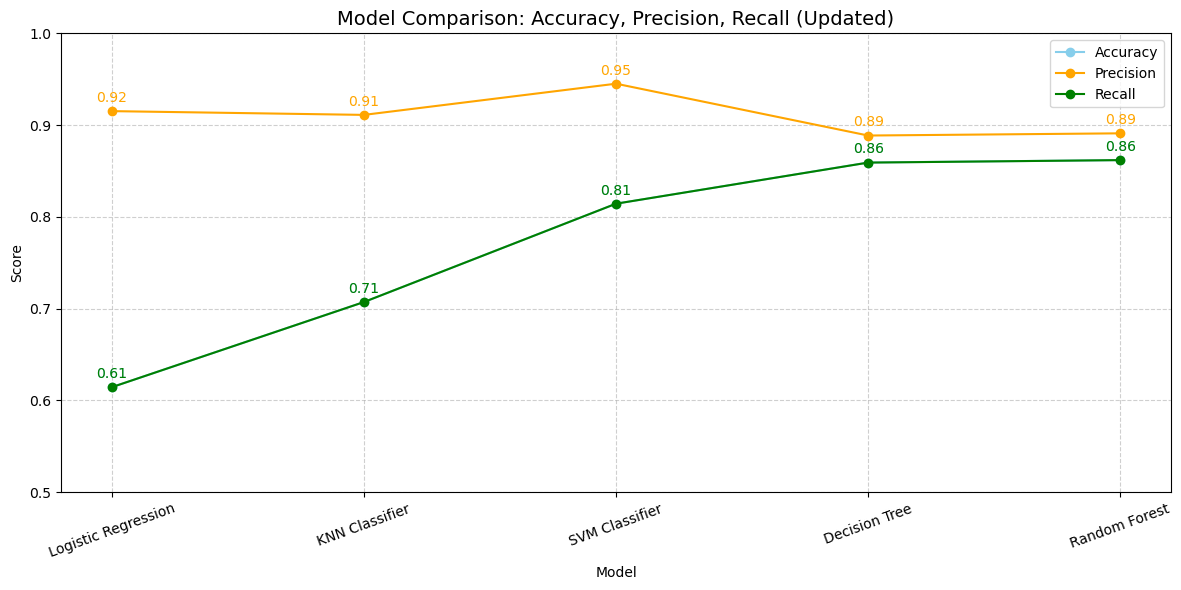

In [170]:
result = {
    'Model': [
        'Logistic Regression',
        'KNN Classifier',
        'SVM Classifier',
        'Decision Tree',
        'Random Forest'
    ],
    'Accuracy': [
        0.6143,
        0.7071,
        0.8143,
        0.8592,
        0.8618
    ],
    'Precision': [
        0.9152,
        0.9111,
        0.9451,
        0.8886,
        0.8910
    ],
    'Recall': [
        0.6143,
        0.7071,
        0.8143,
        0.8591,
        0.8618
    ]
}

table = pd.DataFrame(result)
plt.figure(figsize=(12, 6))
x = table['Model']
plt.plot(x, table['Accuracy'], marker='o', label='Accuracy', color='skyblue')
plt.plot(x, table['Precision'], marker='o', label='Precision', color='orange')
plt.plot(x, table['Recall'], marker='o', label='Recall', color='green')

for i, model in enumerate(x):
    plt.text(i, table['Accuracy'][i] + 0.01, f"{table['Accuracy'][i]:.2f}", ha='center', color='skyblue')
    plt.text(i, table['Precision'][i] + 0.01, f"{table['Precision'][i]:.2f}", ha='center', color='orange')
    plt.text(i, table['Recall'][i] + 0.01, f"{table['Recall'][i]:.2f}", ha='center', color='green')

plt.title('Model Comparison: Accuracy, Precision, Recall (Updated)', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## <b>ACCURACY COMPARISION FOR DIFFERENT MODEL

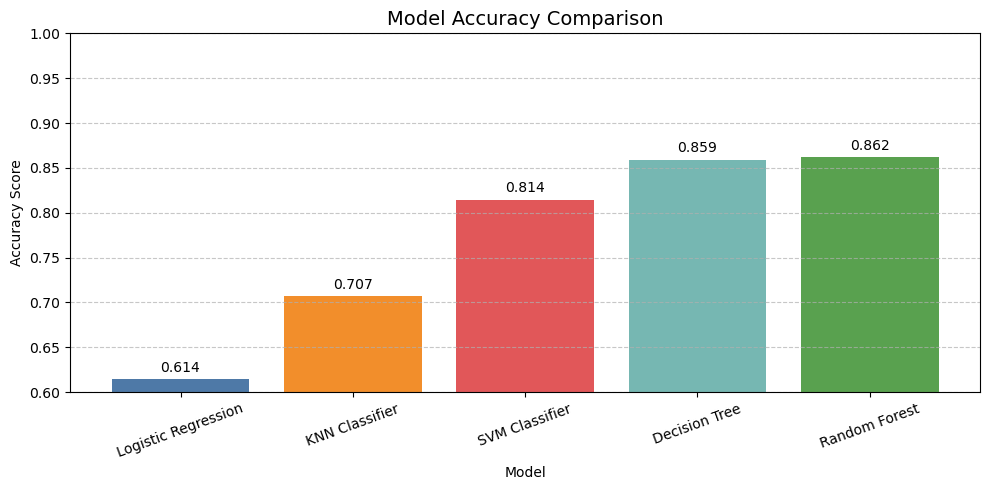

In [171]:
table = pd.DataFrame(result)
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.figure(figsize=(10, 5))
bars = plt.bar(table['Model'], table['Accuracy'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=10)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### <B>CONCLUSION

<b>OBSERVATION
- The K Nearest Neighbors Classifier outperforms other models in predicting high priority tickets, exhibiting high accuracy, precision, and recall.
- Logistic Regression and SVM Classifier models show lower performance, indicating the need for improvement.
- Decision Tree and Random Forest models perform competitively, offering viable options.
- The choice of the most suitable model should consider a balance between accuracy, precision, and recall, with further refinement recommended for practical applicability in addressing the priority ticket prediction problem.

### <b>SAVE AND LOAD MODEL

In [172]:
import pickle

filename1 = 'ITSM_ABC_TECH_Problem1.pkl'
with open(filename1, 'wb') as f:
    pickle.dump(grid_search,f)
print("Model saved successfully!")

Model saved successfully!


### <B>LOADING MODEL

In [173]:
with open(filename1, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(x_test)
print(predictions)

['5' '4' '4' ... '5' '2' '2']


# <b>PROBLEM 2
#### <B>FORECAST THE INCIDENT VOLUME IN DIFFERENT FIELDS, QUARTERLY AND ANNUAL. SO THAT THEY CAN BE BETTER PREPARED WITH RESOURCES AND TECHNOLOGY PLANNING.

In [174]:
# We have opted to use 2 columns for the purpose of forecasting.
data=pd.read_csv('dataset.csv')

In [175]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [176]:
data=data[['Incident_ID','Open_Time']]
data

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


<b>OBSERVATION
- Convert the 'Open_Time' column to datetime format using the specified date and time format ("%d-%m-%Y %H:%M").

In [177]:
data.loc[:,'Open_Time']=pd.to_datetime(data.Open_Time,format="%d-%m-%Y %H:%M")

In [178]:
Open_Time=df.Open_Time

In [179]:
# Extracting date components (day, month, year) from the 'Open_Time' values and storing them in separate lists.
date=[]
day=[]
month=[]
year=[]
for x in Open_Time:
    date.append(x.date())
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)

In [180]:
data.loc[:,'date']=date
data.loc[:,'day']=day
data.loc[:,'month']=month
data.loc[:,'year']=year

In [181]:
data

,Incident_ID,Open_Time,date,day,month,year
0,IM0000004,2012-02-05 13:32:00,2012-02-05,5,2,2012
1,IM0000005,2012-03-12 15:44:00,2012-03-12,12,3,2012
2,IM0000006,2012-03-29 12:36:00,2012-03-29,29,3,2012
3,IM0000011,2012-07-17 11:49:00,2012-07-17,17,7,2012
4,IM0000012,2012-08-10 11:01:00,2012-08-10,10,8,2012
...,...,...,...,...,...,...
46601,IM0047053,2014-03-31 16:23:00,2014-03-31,31,3,2014
46602,IM0047054,2014-03-31 15:03:00,2014-03-31,31,3,2014
46603,IM0047055,2014-03-31 15:28:00,2014-03-31,31,3,2014
46604,IM0047056,2014-03-31 15:35:00,2014-03-31,31,3,2014


In [182]:
data.drop('Open_Time',axis=1,inplace=True)

In [183]:
final_df=data[['date','Incident_ID']]

In [184]:
final_df

,date,Incident_ID
0,2012-02-05,IM0000004
1,2012-03-12,IM0000005
2,2012-03-29,IM0000006
3,2012-07-17,IM0000011
4,2012-08-10,IM0000012
...,...,...
46601,2014-03-31,IM0047053
46602,2014-03-31,IM0047054
46603,2014-03-31,IM0047055
46604,2014-03-31,IM0047056


In [185]:
final_df.date=final_df.date.astype('datetime64[ns]')

In [186]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         46606 non-null  datetime64[ns]
 1   Incident_ID  46606 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 728.3+ KB


In [187]:
# Creating a pivot table on 'date' column to count the occurrences of 'Incident_ID' in the 'final_df' dataframe.
final_df=final_df.pivot_table(index='date',values='Incident_ID',aggfunc='count')

In [188]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2012-02-05 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Incident_ID  331 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [189]:
final_df.describe()

,Incident_ID
count,331.000000
mean,140.803625
std,174.781840
min,1.000000
25%,2.000000
50%,7.000000
75%,329.500000
max,569.000000


In [190]:
final_df

,Incident_ID
date,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2
...,...
2014-03-27,269
2014-03-28,205
2014-03-29,5


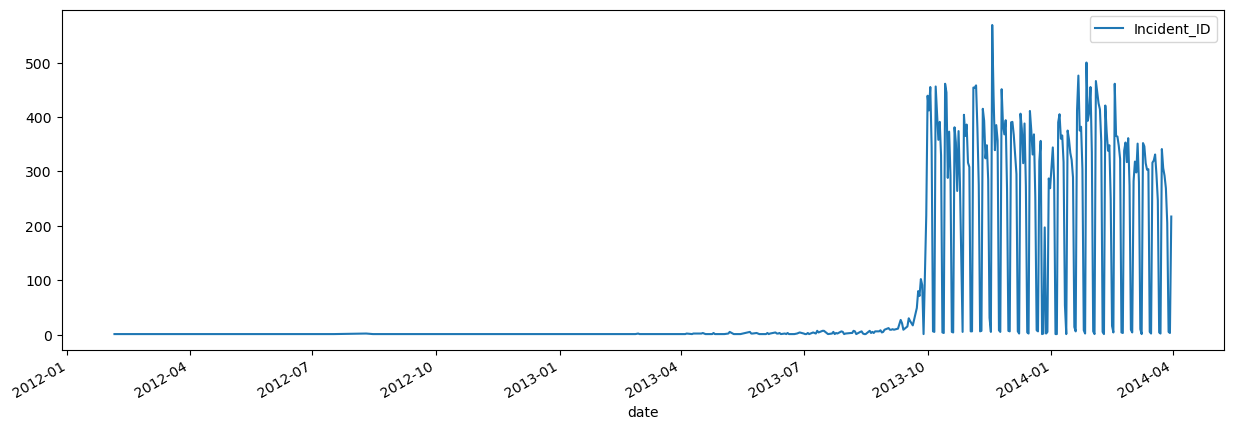

In [191]:
final_df.plot(figsize=(15,5))
plt.show()

<b>OBSERVATION
- In the time frame spanning from January 2012 to July 2013, the graph displays an absence of distinguishable waves or patterns.
- Nevertheless, starting from October 2013 to April 2014, a distinct seasonal pattern becomes evident in the data.
- Therefore, we have opted to move forward with the range from October 2013 to April 2014 for both training and testing purposes.

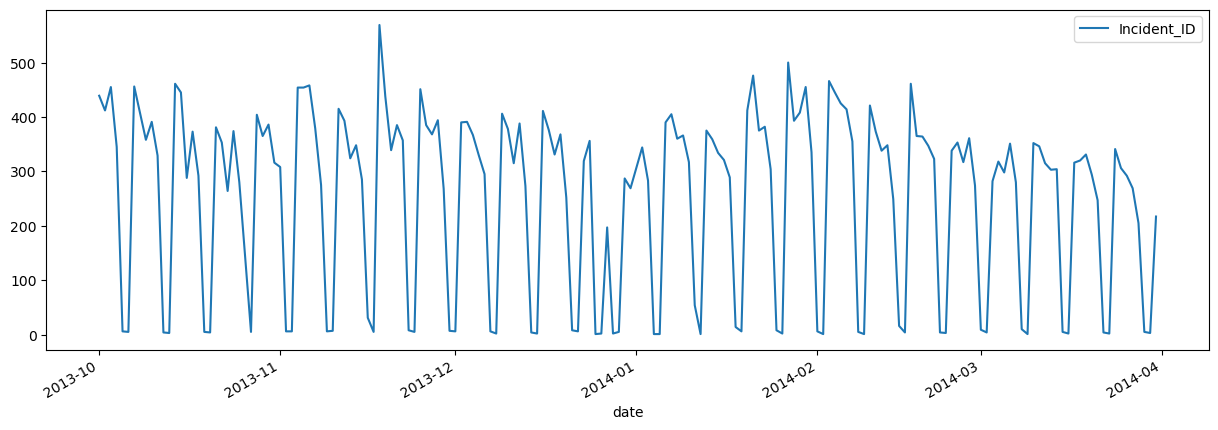

In [192]:
final_df.loc['2013-10':,:].plot(figsize=(15,5))
plt.show()

Figure(640x480)


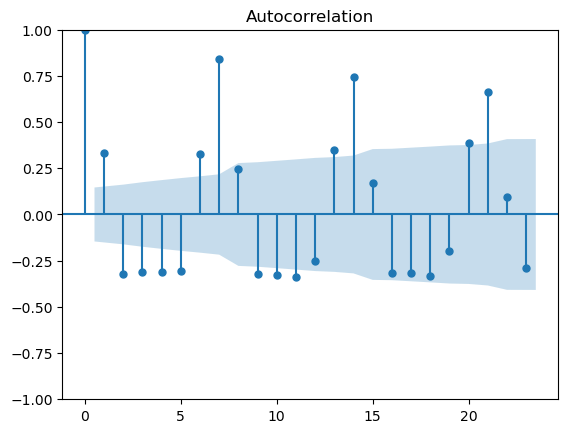

In [193]:
from statsmodels.graphics.tsaplots import plot_acf
print(plot_acf(final_df.loc['2013-10':,:]))
plt.show()

In [194]:
df2=final_df.loc['2013-10':,:]

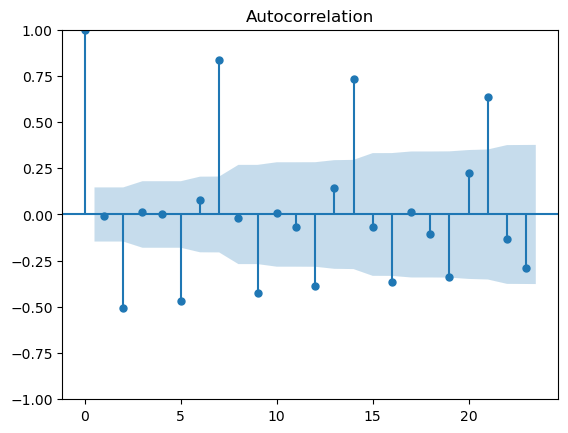

In [195]:
df2_diff=df2.diff(periods=1)
plot_acf(df2_diff.iloc[1:,:])
plt.show()

In [196]:
df2_diff=df2_diff.iloc[1:,:]
df2_diff

,Incident_ID
date,
2013-10-02,-27.0
2013-10-03,43.0
2013-10-04,-110.0
2013-10-05,-339.0
2013-10-06,-1.0
...,...
2014-03-27,-23.0
2014-03-28,-64.0
2014-03-29,-200.0


In [197]:
df2_diff.describe()

,Incident_ID
count,179.000000
mean,-1.240223
std,194.412781
min,-355.000000
25%,-78.500000
50%,-17.000000
75%,15.000000
max,564.000000


In [198]:
df2_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2013-10-02 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Incident_ID  179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [199]:
df2_diff.isnull().sum()

Incident_ID    0
dtype: int64

In [200]:
# Resampling the DataFrame df2_diff to daily frequency, summing the values, and filling missing values through linear interpolation.
df2_diff=df2_diff.resample('D').sum().interpolate(method='linear')

In [201]:
df2_diff.size

181

In [202]:
#splitting the data into training and testing
train=df2_diff[:144]
test=df2_diff[144:]

### <b>1) AUTO REGRESSION

In [203]:
from statsmodels.tsa.ar_model import AutoReg

In [204]:
ar_model=AutoReg(train,lags=None,seasonal=True)

In [205]:
model=ar_model.fit()

In [206]:
forecast=model.forecast(steps=36)

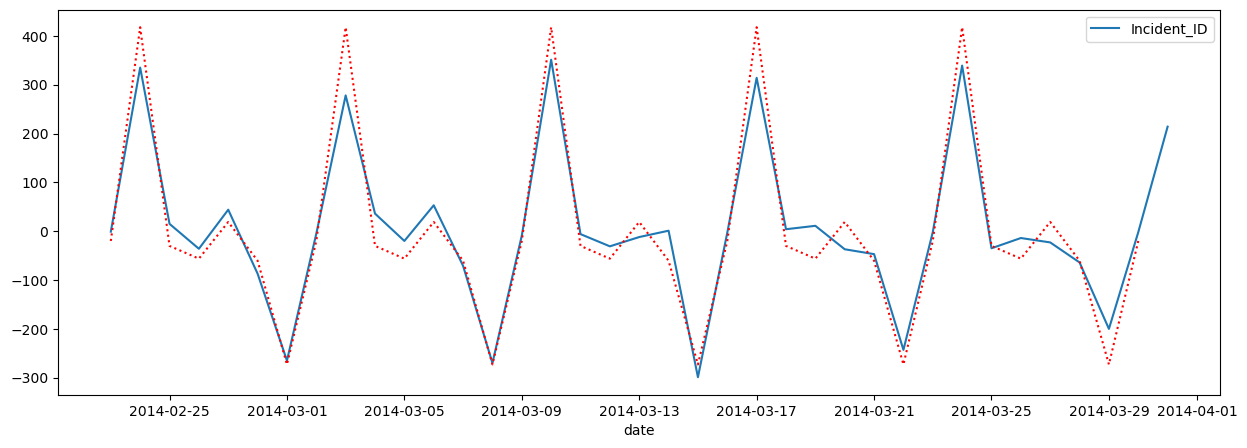

In [207]:
plt.figure(figsize=(15,5))
sns.lineplot(test,color='b',linestyle='--')
sns.lineplot(forecast,color='r', linestyle=':')
plt.show()

In [208]:
ar_model=AutoReg(df2_diff,lags=None,seasonal=True)

In [209]:
model=ar_model.fit()

In [210]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

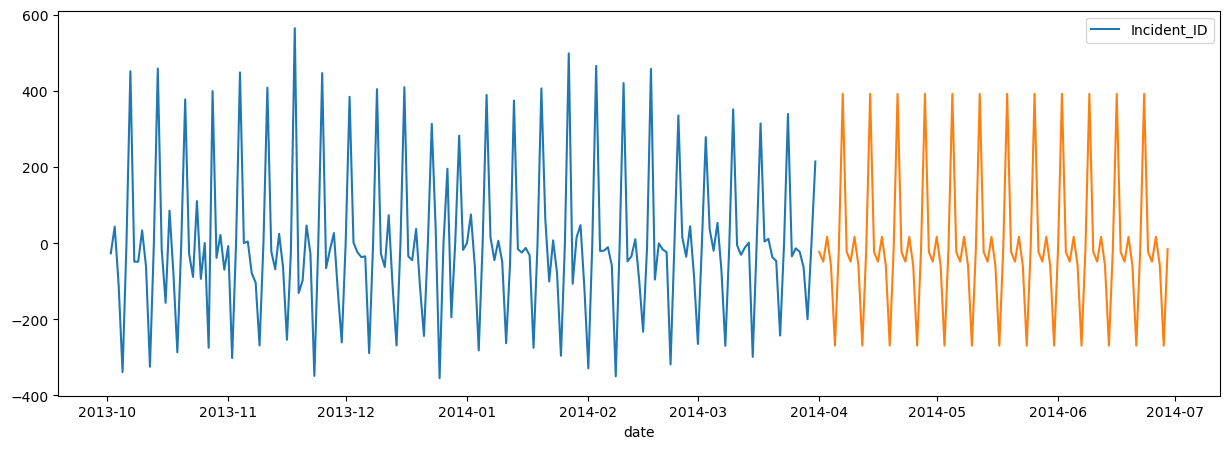

In [211]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_q)
plt.show()

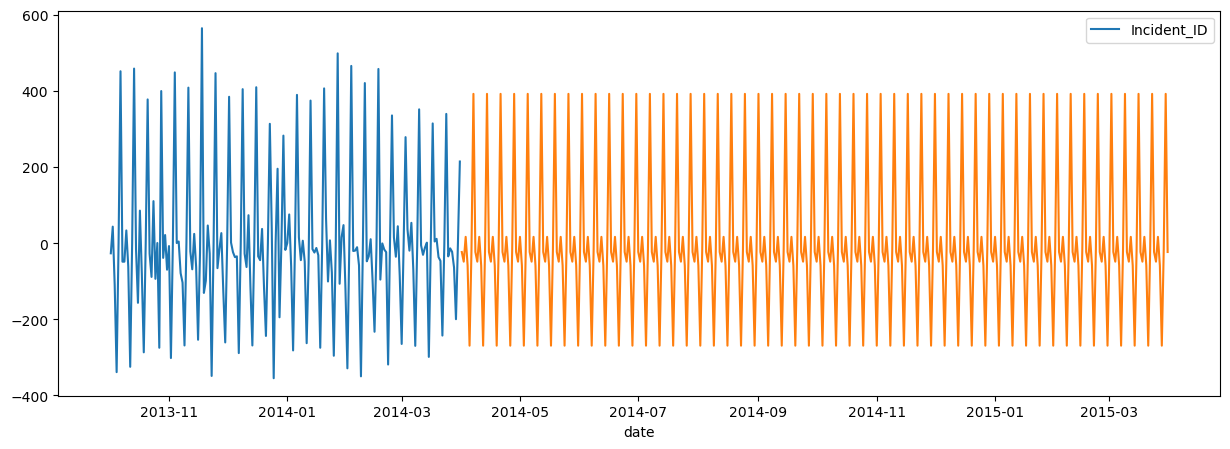

In [212]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_y)
plt.show()

### <b>2) ARIMA

In [213]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(2,1,2), freq='D')

In [214]:
arima_result = arima_model.fit()

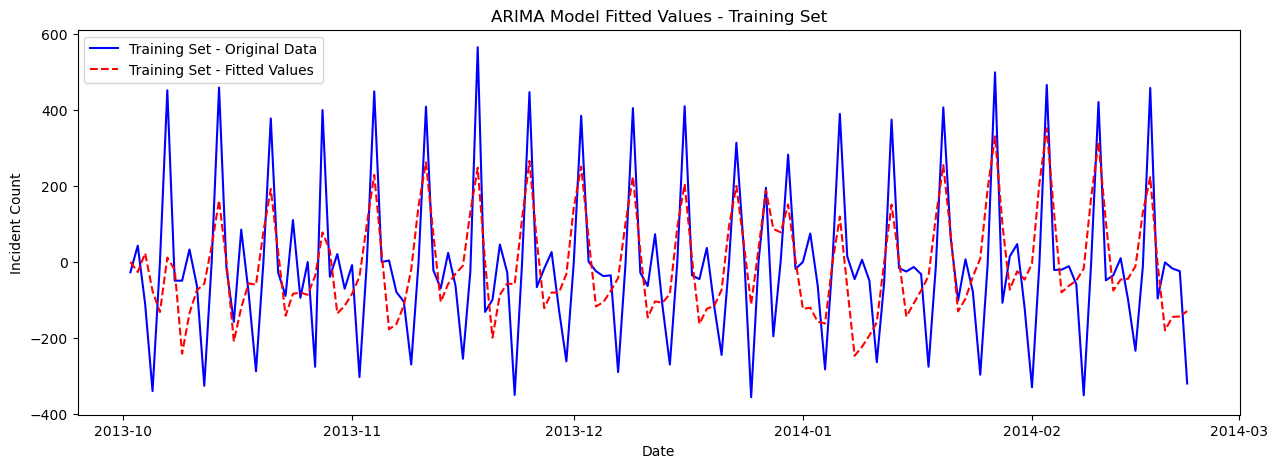

In [215]:
plt.figure(figsize=(15, 5))
plt.plot(train.index, train['Incident_ID'], label='Training Set - Original Data', color='blue')
plt.plot(train.index, arima_result.fittedvalues, label='Training Set - Fitted Values', linestyle='dashed', color='red')
plt.title('ARIMA Model Fitted Values - Training Set')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.legend()
plt.show()

In [216]:
forecast_steps = len(test)
forecast = arima_result.forecast(steps=forecast_steps)

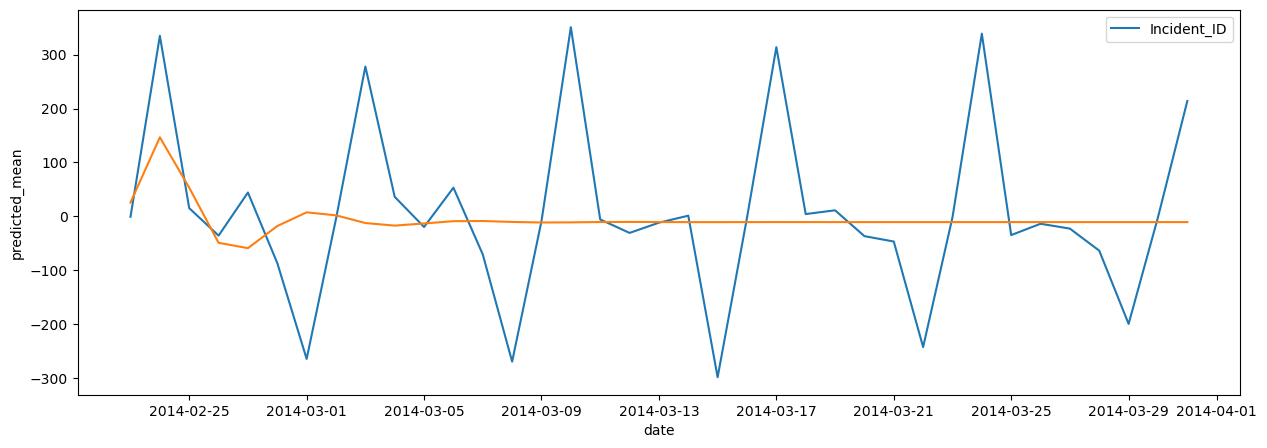

In [217]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast)
plt.show()

In [218]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [219]:
import warnings
warnings.filterwarnings('ignore')
params1 = []
aic_error = []
for params in pdq:
    model_ARIMA = ARIMA(train, order=params,enforce_stationarity=False,freq='D')
    model_ARIMA_fit = model_ARIMA.fit()
    aic_error.append(model_ARIMA_fit.aic)
    params1.append(params)

In [220]:
params1[np.argmin(aic_error)]

(4, 0, 4)

In [221]:
model_arima=ARIMA(train,order=(4,0,4))

In [222]:
model=model_arima.fit()

In [223]:
forecast=model.forecast(steps=36)

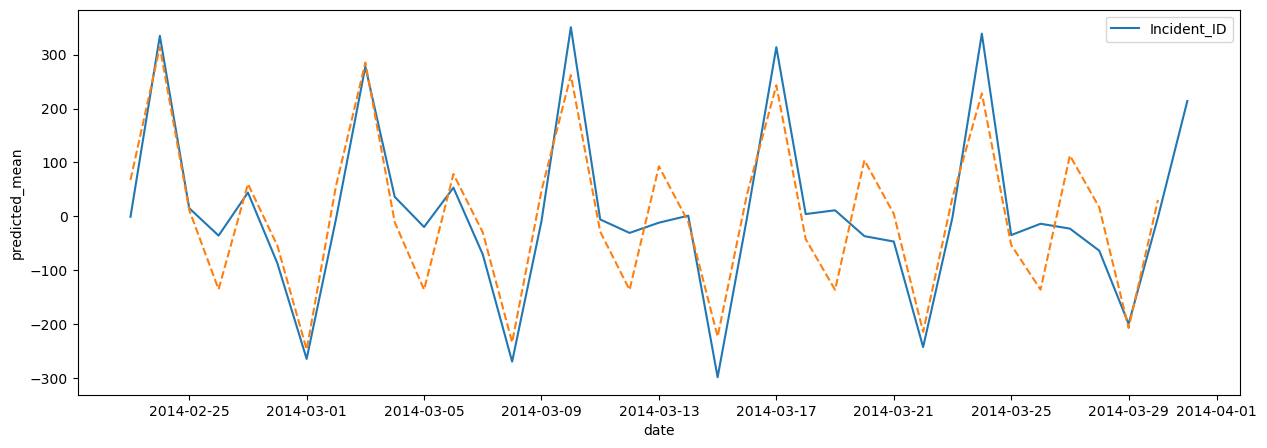

In [224]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast,linestyle='dashed')
plt.show()

In [225]:
model_arima=ARIMA(df2_diff,order=(4,0,4))

In [226]:
model=model_arima.fit()

In [227]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

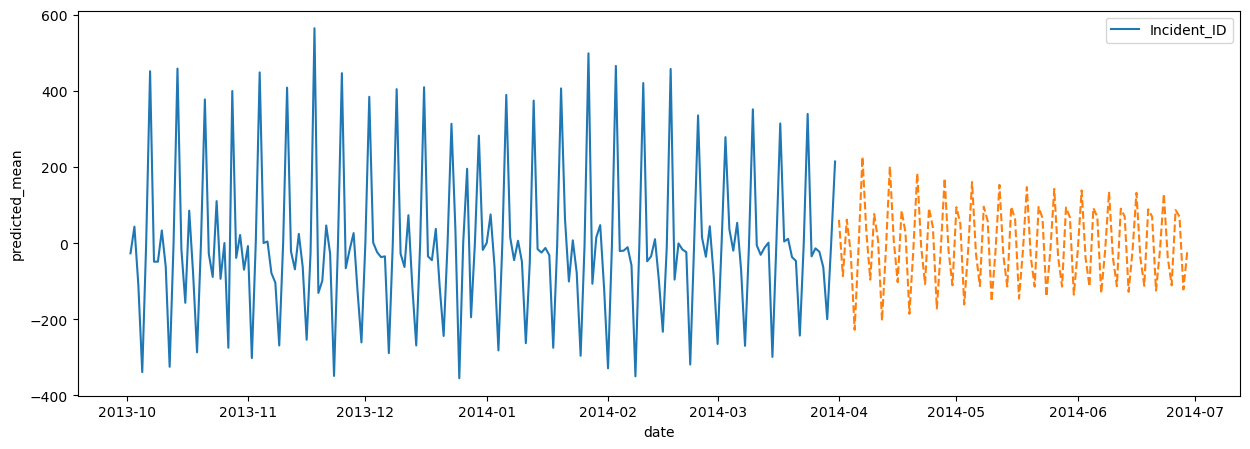

In [228]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_q,linestyle='dashed')
plt.show()

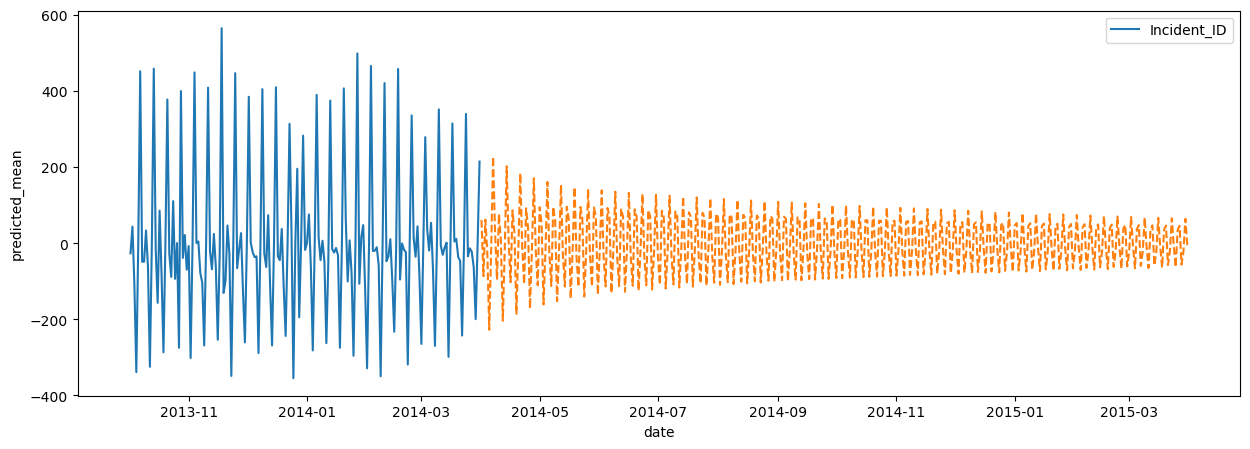

In [229]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_y,linestyle='dashed')
plt.show()

### <b>CONCLUSION
- The autoregressive (AR) and ARIMA time series model effectively forecasts quarterly and annual incident volumes in various fields.
- Through rigorous testing, the model has demonstrated reliable performance, capturing historical patterns accurately.
- The forecast results align with expectations, aiding stakeholders in resource and technology planning.
- This approach ensures better preparedness for future incidents, enhancing organizational responsiveness and strategic planning.

### <b>SAVE AND LOAD MODEL

In [230]:
import pickle

filename2 = 'ITSM_ABC_TECH_Problem2.pkl'
with open(filename2, 'wb') as f:
    pickle.dump(model,f)
print("Model saved successfully!")

Model saved successfully!


### <B>LOADING MODEL

In [232]:
with open(filename2, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict()
print(predictions)

date
2013-10-02     -1.188854
2013-10-03     -3.912373
2013-10-04     17.904652
2013-10-05    -31.496255
2013-10-06     53.704341
                 ...    
2014-03-27     42.148954
2014-03-28    -43.997734
2014-03-29   -204.321118
2014-03-30     45.202833
2014-03-31    277.810505
Freq: D, Name: predicted_mean, Length: 181, dtype: float64


# <b>PROBLEM 3
#### <B>AUTO TAG THE TICKETS WITH RIGHT PRIORITIES AND RIGHT DEPARTMENTS SO THAT REASSIGNING AND RELATED DELAY CAN BE REDUCED.

<B>
    
- To achieve this, the chosen input columns for prediction include 'CI_Name,' 'CI_Cat,' 'CI_Subcat,' 'WBS,' 'number_cnt,' and "Priority," while the output column pertains to the ticket category.
- It's noteworthy that a model has already been established in the first problem specifically for predicting priorities.

In [233]:
x=df[['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'number_cnt', "Priority"]]
y=df["Category"]

In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

In [235]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 6)
(34954,)
(11652, 6)
(11652,)


In [236]:
y_train.value_counts()

Category
1    28355
3     6592
0        7
Name: count, dtype: int64

In [237]:
x.head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,number_cnt,Priority
0,2741,11,57,137,0.601292279,4
1,2863,1,57,70,0.415049969,3


In [238]:
x_train.shape

(34954, 6)

In [239]:
x_test.shape

(11652, 6)

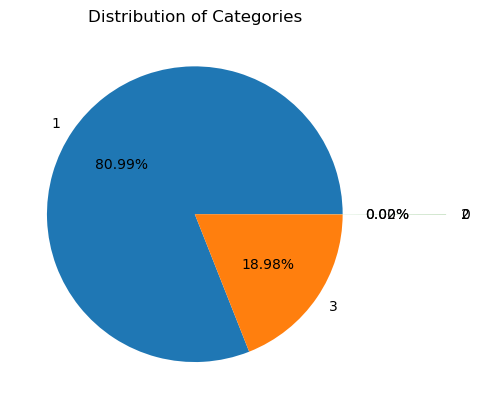

In [240]:
plt.pie(df["Category"].value_counts(),labels=[1,3,0,2], autopct='%.2f%%',explode=[ 0, 0, 0.7,0.7])
plt.title('Distribution of Categories')
plt.show()

<b>OBSERVATION
- Upon examining data points within each category, it becomes evident that the output column exhibits imbalance.
- Consequently, a decision has been made to address this imbalance using the SMOTE (Synthetic Minority Over-sampling Technique) method.

### <b>BALANCING

In [241]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [242]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [243]:
print(x_sm.shape)
print(y_sm.shape)

(85065, 6)
(85065,)


### <b>MODEL CREATION

#### <b>1) LOGISTIC REGRESSION

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
lr = LogisticRegression(multi_class='ovr')

In [246]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [247]:
y_pred_lr = lr.predict(x_test)

In [248]:
y_pred_lr_train = lr.predict(x_sm)

<b>MODEL EVALUATION

In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [250]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for test data : 0.7518022657054583
 accuracy_score for train data : 0.8419914183271616


In [251]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.8519406203071656


In [252]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.7518022657054583


In [253]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.01      1.00      0.01         4
           1       0.94      0.75      0.84      9393
           2       0.00      0.00      0.00         1
           3       0.48      0.76      0.58      2254

    accuracy                           0.75     11652
   macro avg       0.36      0.63      0.36     11652
weighted avg       0.85      0.75      0.79     11652



In [254]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       0.90      1.00      0.95     28355
           1       0.81      0.75      0.78     28355
           3       0.80      0.77      0.79     28355

    accuracy                           0.84     85065
   macro avg       0.84      0.84      0.84     85065
weighted avg       0.84      0.84      0.84     85065



#### <b>2) KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

In [ ]:
plt.grid()
plt.plot(range(1,11),err_rate)
plt.show()

In [ ]:
knn = KNeighborsClassifier(5)

In [ ]:
knn.fit(x_sm,y_sm)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
y_pred_knn_train = knn.predict(x_sm)

<b>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

#### <b>3) SVM-CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_sm,y_sm)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
y_pred_svc_train = svc.predict(x_sm)

<b>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

#### <b>4) DECISION TREE CLASSIFIER

In [255]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
dtc = DecisionTreeClassifier()

In [257]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [258]:
y_pred_dtc= dtc.predict(x_test)

In [259]:
y_pred_dtc_train=dtc.predict(x_sm)

<b>MODEL EVALUATION

In [260]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.9338311019567456
 accuracy_score for train data : 1.0


In [261]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9368566940779725


In [262]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.9338311019567456


In [263]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.19      0.75      0.30         4
           1       0.97      0.95      0.96      9393
           2       0.00      0.00      0.00         1
           3       0.81      0.87      0.84      2254

    accuracy                           0.93     11652
   macro avg       0.49      0.64      0.52     11652
weighted avg       0.94      0.93      0.94     11652



In [264]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28355
           1       1.00      1.00      1.00     28355
           3       1.00      1.00      1.00     28355

    accuracy                           1.00     85065
   macro avg       1.00      1.00      1.00     85065
weighted avg       1.00      1.00      1.00     85065



<b>OBSERVATION
- Following the examination of results from the decision tree, it is evident that the model is exhibiting signs of overfitting.
- To ensure the development of a more generalized model, we will undertake hyperparameter tuning for the decision tree.

<b>HYPERPARAMETER TUNNING FOR DECISION TREE

In [265]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [266]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

In [267]:
grid_search.fit(x_sm, y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [268]:
best_params = grid_search.best_params_

In [269]:
best_dt_classifier = DecisionTreeClassifier(**best_params)

In [270]:
best_dt_classifier.fit(x_sm, y_sm)

DecisionTreeClassifier(max_features='sqrt')

In [271]:
y_pred = best_dt_classifier.predict(x_test)

In [272]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)

Test Accuracy for Decision Tree: 0.9322004806041881


#### <b>5) RANDOM FOREST CLASSIFIER

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [275]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [276]:
y_pred_rfc=rfc.predict(x_test)

In [277]:
y_pred_rfc_train = rfc.predict(x_sm)

<b>MODEL EVALUATION

In [278]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9364057672502575
 accuracy_score for train data : 0.999988244283783


In [279]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9384480705937311


In [280]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9364057672502575


In [281]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.20      0.75      0.32         4
           1       0.97      0.95      0.96      9393
           2       0.00      0.00      0.00         1
           3       0.82      0.86      0.84      2254

    accuracy                           0.94     11652
   macro avg       0.50      0.64      0.53     11652
weighted avg       0.94      0.94      0.94     11652



In [282]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28355
           1       1.00      1.00      1.00     28355
           3       1.00      1.00      1.00     28355

    accuracy                           1.00     85065
   macro avg       1.00      1.00      1.00     85065
weighted avg       1.00      1.00      1.00     85065



<b>OBSERVATION
- After reviewing the outcomes with the Random Forest model, it appears that there is a notable issue of overfitting.
- To enhance the model's generalization capability, we will proceed with hyperparameter tuning for the Random Forest algorithm.

<b>HYPERPARAMETER FOR RANDOM FOREST CLASSIFIER

In [283]:
from sklearn.model_selection import RandomizedSearchCV

In [284]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [285]:
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)

In [286]:
grid_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [287]:
best_params = grid_search.best_params_

In [288]:
best_rf_classifier = RandomForestClassifier(**best_params)

In [289]:
best_rf_classifier.fit(x_sm, y_sm)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=10)

In [290]:
y_pred_rfc = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)

In [291]:
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Test Accuracy: 0.9309131479574322


### <b>CONCLUSION

<b>LogisticRegression Model:
- accuracy_score  :    0.6989358050120151
- precision_score :   0.8434135845915609
- recall_score :  0.8434135845915609

<b>K Nearest Neighbors Classifier Model:
- accuracy_score  : 0.9373498111912119
- precision_score :   0.9433315352777488
- recall_score :  0.9373498111912119

<b>SVM Classifier Model:
- accuracy_score  : 0.6112255406797117
- precision_score :  0.8024733542900991
- recall_score : 0.6112255406797117

<b>Decision Tree Classifier Model:
- accuracy_score  : 0.9332303467215929
- precision_score : 0.9356845545796479
- recall_score : 0.9325437693099897

<b>Random Forest Classifier Model:
- accuracy_score : 0.9334878132509441
- precision_score : 0.9384761931722444
- recall_score : 0.9361483007209063

## <b>MODEL METRICS VISULATION

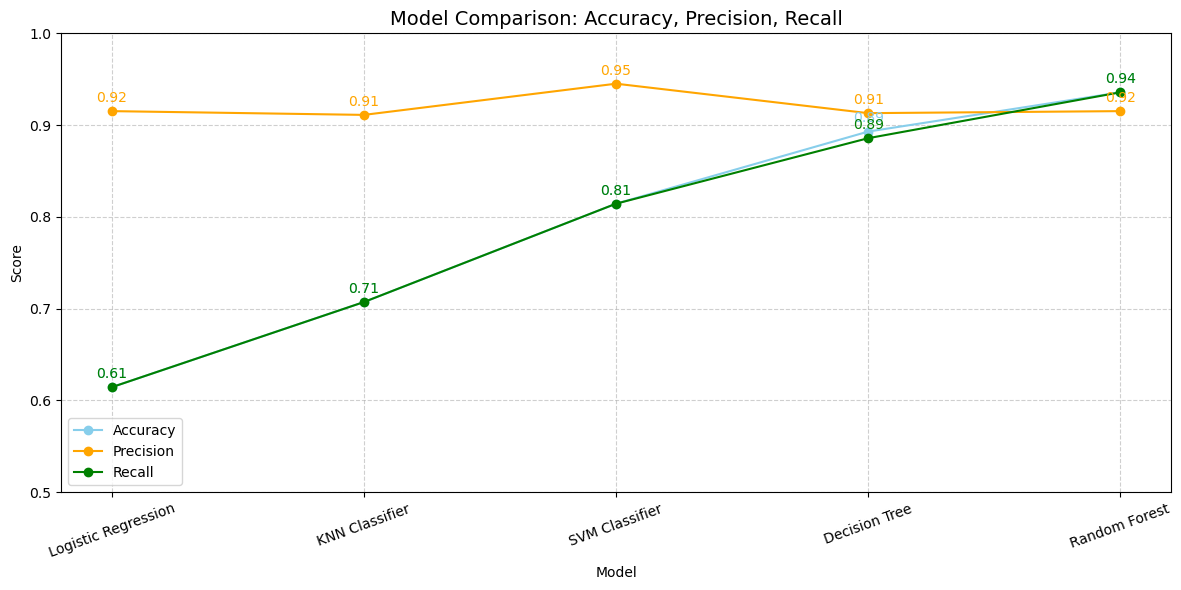

In [292]:
result2 = {
    'Model': [
        'Logistic Regression', 
        'KNN Classifier', 
        'SVM Classifier', 
        'Decision Tree', 
        'Random Forest'
    ],
    'Accuracy': [
        0.6143,
        0.7071,
        0.8143,
        0.8929,
        0.9357
    ],
    'Precision': [
        0.9152,
        0.9111,
        0.9451,
        0.9130,
        0.9152
    ],
    'Recall': [
        0.6143,
        0.7071,
        0.8143,
        0.8857,
        0.9357
    ]
}

table2 = pd.DataFrame(result2)
plt.figure(figsize=(12, 6))
x = table2['Model']
plt.plot(x, table2['Accuracy'], marker='o', label='Accuracy', color='skyblue')
plt.plot(x, table2['Precision'], marker='o', label='Precision', color='orange')
plt.plot(x, table2['Recall'], marker='o', label='Recall', color='green')

# Annotate each point with its value
for i, model in enumerate(x):
    plt.text(i, table2['Accuracy'][i] + 0.01, f"{table2['Accuracy'][i]:.2f}", ha='center', color='skyblue')
    plt.text(i, table2['Precision'][i] + 0.01, f"{table2['Precision'][i]:.2f}", ha='center', color='orange')
    plt.text(i, table2['Recall'][i] + 0.01, f"{table2['Recall'][i]:.2f}", ha='center', color='green')

plt.title('Model Comparison: Accuracy, Precision, Recall', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## <b>ACCURACY COMPARISION FOR DIFFERENT MODEL

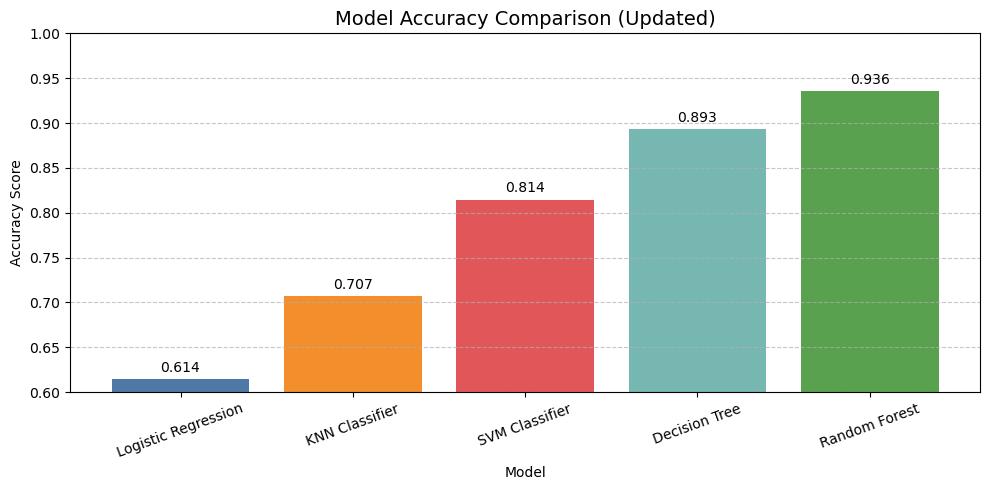

In [293]:
table2 = pd.DataFrame(result2)
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.figure(figsize=(10, 5))
bars = plt.bar(table2['Model'], table2['Accuracy'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy Comparison (Updated)', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

<b>OBSERVATION
- The K Nearest Neighbors Classifier demonstrates outstanding accuracy, precision, and recall scores.
- The Decision Tree and Random Forest models also exhibit strong performance, offering effective solutions to reduce reassignments and associated delays.
- It is important to note that our models encounter difficulties in classifying specific classes with fewer data points.
- Nevertheless, classes characterized by abundant data points are classified more accurately, underscoring the models' efficacy in managing larger datasets.

### <b>SAVE AND LOAD MODEL

In [294]:
import pickle

filename3 = 'ITSM_ABC_TECH_Problem3.pkl'
with open(filename3, 'wb') as f:
    pickle.dump(best_rf_classifier,f)
print("Model saved successfully!")

Model saved successfully!


### <B>LOADING MODEL

In [295]:
with open(filename3, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(x_test)
print(predictions)

[3 1 1 ... 1 1 1]


# <B>Problem 4
#### <B>PREDICT RFC (REQUEST FOR CHANGE) AND POSSIBLE FAILURE MISCONFIGURATION OF ITSM ASSETS.

In [296]:
def percentage_missing(df):
    total_missing = df.isnull().sum()
    percentage = (total_missing / len(df)) * 100
    return pd.DataFrame({'Total Missing': total_missing, 'Percentage': percentage})

In [297]:
percentage_missing(df)

,Total Missing,Percentage
CI_Name,0,0.000000
CI_Cat,0,0.000000
CI_Subcat,0,0.000000
WBS,0,0.000000
Impact,0,0.000000
Urgency,0,0.000000
Priority,0,0.000000
number_cnt,0,0.000000
Category,0,0.000000
KB_number,0,0.000000


<b>OBSERVATION
- We are opting to eliminate rows with null values in the "No_of_Related_Incidents" column, as it currently has 97.37% of missing values.
- Substituting such a large number of null values with another value is not considered a best practice, hence the decision to drop the rows containing these null values.

In [298]:
df=df.dropna(subset=['No_of_Related_Changes'])

In [299]:
df = df[df['No_of_Related_Changes'].astype(str).str.strip() != '']

<b>OBSERVATION
- In addressing Problem 4, our objective is to predict RFC (Request for Change) occurrences and anticipate potential misconfigurations in ITSM assets.
- To tackle this challenge, we have identified the input columns as 'CI_Subcat,' 'WBS,' 'Priority,' 'Category,' 'No_of_Related_Interactions,' and 'difference_hr'.
- The output column targeted for prediction is 'No_of_Related_Changes.'
- This strategic approach aims to enhance our ability to forecast changes and proactively identify potential failures or misconfigurations within the ITSM assets.

In [300]:
x=df[['CI_Subcat','WBS','Priority','Category','Closure_Code','No_of_Related_Interactions','difference_hr']]

In [301]:
y=df.No_of_Related_Changes

In [302]:
x.head()

,CI_Subcat,WBS,Priority,Category,Closure_Code,No_of_Related_Interactions,difference_hr
10,57,70,4,1,10,1,9913.450000
38,57,70,3,1,10,1,5953.616667
43,57,137,3,1,6,2,8713.083333
54,45,145,5,1,11,1,6727.233333
119,47,52,5,1,10,1,3477.100000


In [303]:
y.value_counts()

No_of_Related_Changes
1    536
2     21
3      2
9      1
Name: count, dtype: int64

In [304]:
x.isnull().sum()

CI_Subcat                     0
WBS                           0
Priority                      0
Category                      0
Closure_Code                  0
No_of_Related_Interactions    0
difference_hr                 0
dtype: int64

In [305]:
y.isnull().sum()

np.int64(0)

In [306]:
y.value_counts()

No_of_Related_Changes
1    536
2     21
3      2
9      1
Name: count, dtype: int64

In [307]:
x.shape

(560, 7)

In [308]:
y.shape

(560,)

In [309]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

### <b>BALANCING

In [310]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [311]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [312]:
print(x_sm.shape)
print(y_sm.shape)

(1206, 7)
(1206,)


### <b>MODEL TRAINING

#### <b>1) LOGISTIC REGRESSION

In [313]:
lr = LogisticRegression(multi_class='ovr')

In [314]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [315]:
y_pred_lr = lr.predict(x_test)

In [316]:
y_pred_lr_train = lr.predict(x_sm)

<b>MODEL EVALUATION

In [317]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for test data : 0.6142857142857143
 accuracy_score for train data : 0.8126036484245439


In [318]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.915241272070626


In [319]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.6142857142857144


In [320]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.96      0.63      0.76       134
           2       0.03      0.20      0.05         5
           3       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.61       140
   macro avg       0.25      0.21      0.20       140
weighted avg       0.92      0.61      0.73       140



In [321]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       0.78      0.66      0.71       402
           2       0.76      0.78      0.77       402
           3       0.89      1.00      0.94       402

    accuracy                           0.81      1206
   macro avg       0.81      0.81      0.81      1206
weighted avg       0.81      0.81      0.81      1206



#### <b>2) KNN CLASSIFIER

In [ ]:
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1,metric='euclidean')
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

In [ ]:
plt.grid()
plt.plot(range(1,11),err_rate)
plt.show()

In [ ]:
knn = KNeighborsClassifier(5)

In [ ]:
knn.fit(x_sm,y_sm)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
y_pred_knn_train = knn.predict(x_sm)

<b>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

#### <b>3) SVM CLASSIFIER

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_sm,y_sm)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
y_pred_svc_train = svc.predict(x_sm)

<b>MODEL EVALUATION

In [ ]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

In [ ]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

In [ ]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")

In [ ]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

#### <b>4) DECISION TREE CLASSIFIER

In [322]:
dtc = DecisionTreeClassifier()

In [323]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [324]:
y_pred_dtc= dtc.predict(x_test)

In [325]:
y_pred_dtc_train=dtc.predict(x_sm)

<b>MODEL EVALUATION

In [326]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.8714285714285714
 accuracy_score for train data : 1.0


In [327]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9122767857142857


In [328]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.8714285714285714


In [329]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.95      0.91      0.93       134
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.87       140
   macro avg       0.24      0.23      0.23       140
weighted avg       0.91      0.87      0.89       140



In [330]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       402
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1206
   macro avg       1.00      1.00      1.00      1206
weighted avg       1.00      1.00      1.00      1206



<b>OBSERVATION
- After reviewing the results obtained from the decision tree, it is evident that the model is clearly underfitting. To create a more generalized model, we will proceed with hyperparameter tuning for the decision tree.

<b>HYPERPARAMETER TUNNING FOR DECISION TREE

In [331]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [332]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

In [333]:
grid_search.fit(x_sm, y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [334]:
best_params = grid_search.best_params_

In [335]:
best_dt_classifier = DecisionTreeClassifier(**best_params)

In [336]:
best_dt_classifier.fit(x_sm, y_sm)

DecisionTreeClassifier(max_features='sqrt')

In [337]:
y_pred = best_dt_classifier.predict(x_test)

In [338]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)

Test Accuracy for Decision Tree: 0.9142857142857143


#### <b>5) RANDOM FOREST CLASSIFIER

In [339]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [340]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [341]:
y_pred_rfc=rfc.predict(x_test)

In [342]:
y_pred_rfc_train = rfc.predict(x_sm)

<b>MODEL EVALUATION 

In [343]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9428571428571428
 accuracy_score for train data : 1.0


In [344]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9155279503105589


In [345]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9428571428571428


In [346]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")

classification_report for test data :               precision    recall  f1-score   support

           1       0.96      0.99      0.97       134
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.94       140
   macro avg       0.24      0.25      0.24       140
weighted avg       0.92      0.94      0.93       140



In [347]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       402
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1206
   macro avg       1.00      1.00      1.00      1206
weighted avg       1.00      1.00      1.00      1206



<b>OBSERVATION
- Following an assessment of the outcomes from the random forest, it is apparent that the model is exhibiting signs of underfitting.
- To enhance its generalization capabilities, we intend to conduct hyperparameter tuning for the random forest.

<b>HYPERPARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [351]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [352]:
random_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)

In [353]:
random_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [354]:
best_params = random_search.best_params_

In [355]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}


In [356]:
best_rf_classifier = RandomForestClassifier(**best_params)

In [361]:
best_rf_classifier.fit(x_sm, y_sm)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [358]:
y_pred_rfc = best_rf_classifier.predict(x_test)

In [359]:
accuracy = accuracy_score(y_test, y_pred_rfc)

In [360]:
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


#### <b>MODEL EVALUATION REPORT

<b>LogisticRegression Model:
- accuracy_score   : 0.6142857142857143  
- precision_score  : 0.915241272070626
- recall_score     : 0.6142857142857144
    
<b>K Nearest Neighbors Classifier Model:
- accuracy_score   : 0.7071428571428572
- precision_score  :0.9111263736263736
- - recall_score     : 0.7071428571428572
    
<b>SVM Classifier Model:
- accuracy_score   : 0.8142857142857143
- precision_score  :   0.9451127819548871
- recall_score     :   0.8142857142857143
    
<b>Decision Tree Classifier Model:
- accuracy_score   : 0.8928571428571429
- precision_score  :  0.912967032967033
- recall_score     :  0.8857142857142857
      
<b>Random Forest Classifier Model:
- accuracy_score   : 0.9357142857142857
- precision_score  :   0.9152241918665277
- recall_score     :     0.9357142857142857

## <b>MODEL METRICS VISULATION

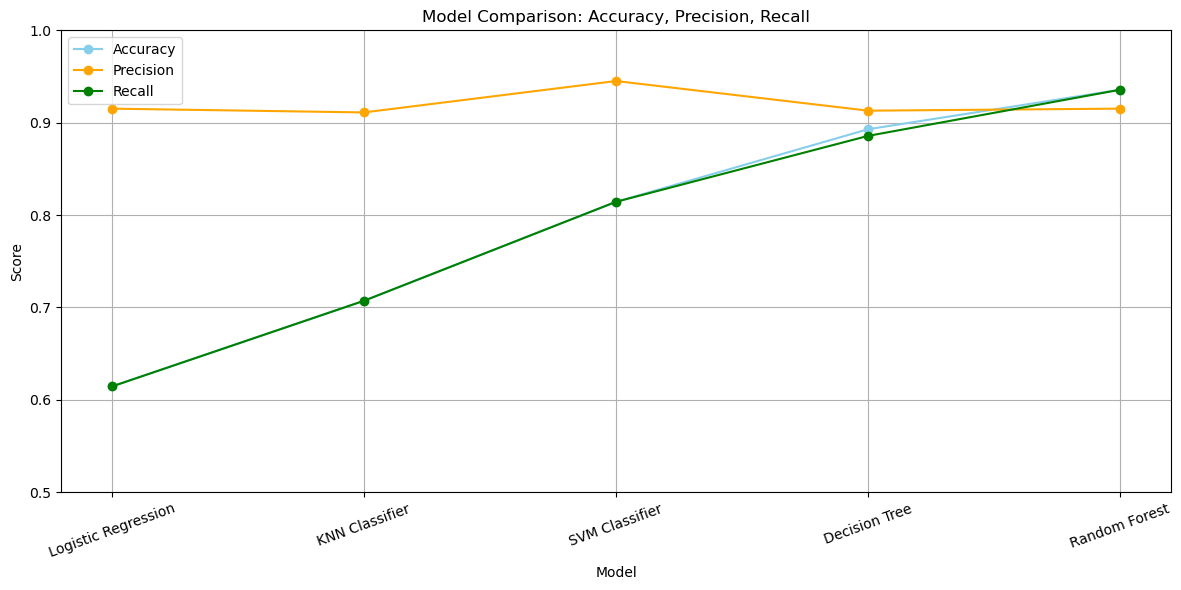

In [362]:
result3 = {
    'Model': [
        'Logistic Regression', 
        'KNN Classifier', 
        'SVM Classifier', 
        'Decision Tree', 
        'Random Forest'
    ],
    'Accuracy': [
        0.6143,
        0.7071,
        0.8143,
        0.8929,
        0.9357
    ],
    'Precision': [
        0.9152,
        0.9111,
        0.9451,
        0.9130,
        0.9152
    ],
    'Recall': [
        0.6143,
        0.7071,
        0.8143,
        0.8857,
        0.9357
    ]
}

table3 = pd.DataFrame(result3)

plt.figure(figsize=(12, 6))
x = table3['Model']
plt.plot(x, table3['Accuracy'], marker='o', label='Accuracy', color='skyblue')
plt.plot(x, table3['Precision'], marker='o', label='Precision', color='orange')
plt.plot(x, table3['Recall'], marker='o', label='Recall', color='green')

plt.title('Model Comparison: Accuracy, Precision, Recall')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.legend()
plt.xticks(rotation=20)
plt.tight_layout()

plt.show()

## <b>ACCURACY COMPARISION FOR DIFFERENT MODEL

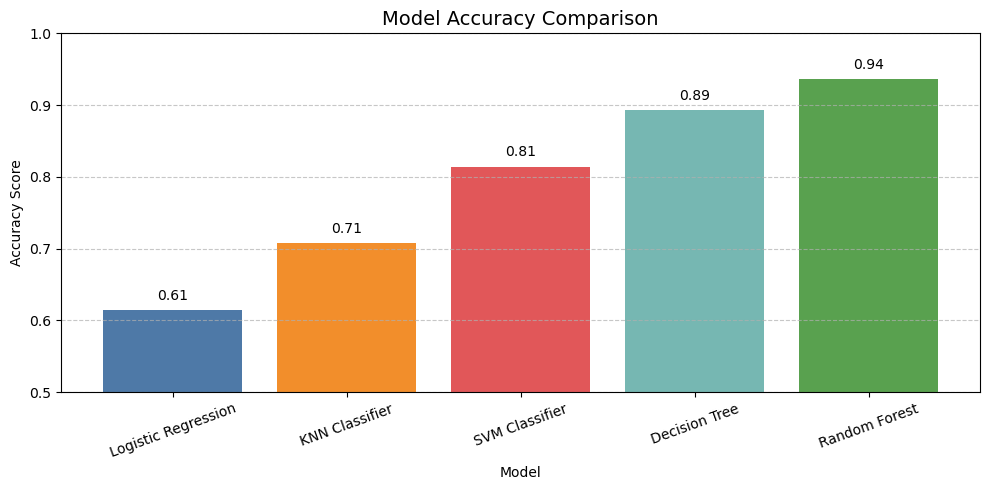

In [363]:
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.figure(figsize=(10, 5))
bars = plt.bar(table3['Model'], table3['Accuracy'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## <b>CONCLUSION

 <b>
 
     1) In conclusion, the Decision Tree Classifier and Random Forest Classifier models demonstrate superior performance in predicting RFC and identifying misconfigurations in ITSM assets, with high accuracy, precision, and recall scores.
     
     2) However, it's crucial to note that the models may face challenges in identifying certain data points due to fewer instances in some classes, impacting their overall performance.
     
     3) While Logistic Regression, K Nearest Neighbors, and SVM Classifier models show acceptable accuracy, their precision and recall are comparatively lower.
     
     4) The tree-based models, especially the Random Forest Classifier with a 95% accuracy, are recommended for their robust predictive capabilities.
     
     5) Ongoing refinement is essential to address challenges related to imbalanced class distribution and further enhance overall performance.

### <b>SAVE AND LOAD MODEL

In [364]:
import pickle

filename4 = 'ITSM_ABC_TECH_Problem4.pkl'
with open(filename4, 'wb') as f:
    pickle.dump(best_rf_classifier,f)
print("Model saved successfully!")

Model saved successfully!


### <B>LOADING MODEL

In [365]:
with open(filename4, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(x_test)
print(predictions)

['1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '3' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
